<a href="https://colab.research.google.com/github/RuthNduta/Car-insurance-prediction/blob/main/Car_Insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description
Car insurance offers protection against accidents, theft, natural calamities & other unforeseen circumstances that could harm your vehicle. Having a good motor insurance policy ensures that you and your car are protected from the financial losses of these unfortunate events.



Government has also made it compulsory to have vehicle insurance to drive cars on roads.

 





#Problem Statement

Imagine you are a data scientist at a bank in your city. Your bank besides usual services also provides car insurance services. The bank has potential customers data and bank employees call them for advertising available car insurance options.

You are provided with general information about clients (age,job,etc.) as well as more specific information about the current insurance sell campaign (communication,last contact day) and previous campaign (attributes like previous attempts,outcome etc).

You have data about 3100 customers who were contacted during the last campaign and for whom the results of the campaign (if the customer bought insurance or not) are known.

 



#Objective

To build a machine learning model to predict if these customers will buy the car insurance or not.

#Data Description
You are provided 935 customers data who were contacted during the current campaign. There are **19** variables (including the target variable) in the train dataset. Below are some of the listed variables and their description:

 

- age: age of the customer
- job_type: what job does customer do
- marital_status: if the customer is married or not
- education_level: education level of the customer
- default_or_not: if the customer was able to repay in time or not
- balance_amt: balance amount of the customer in the bank
- hoursehold_insurance: if the customer has bought household insurance or not
- car_loan: if the customer has car loan
- communication: mode of communication
- last_contact_day: when the customer was last contacted (day)
- last_contact_month: when the customer was last contacted (month)
- no_of_contacts: How many times was the customer contacted
- days_passed: days passed since the last contact (-1 means the data is missing)
- prev_attempts: how many times was the customer previously contacted 
- outcome: what was the outcome of the last contact
- call_start: call start time
- call_end: call end time
- **car_insurance: if the customer bought car insurance (the target variable, 1 - bought, 0 - not bought)**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('max_colwidth', 500)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load files
train = pd.read_csv('/content/Train_data.csv')
test = pd.read_csv('/content/Test_data.csv')
samplesubmission = pd.read_csv('/content/Sample_Submission.csv')


In [ ]:
# Preview the first five rows of the train set
train.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1


In [ ]:
# Preview the first five rows of the test set
test.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end
0,65.000000,retired,married,secondary,0,20806.0,0,0,telephone,8,apr,2,-1,0,NaN,12:22:13,12:30:56
1,36.000000,management,married,tertiary,0,900.0,1,0,NaN,15,may,2,-1,0,NaN,17:59:45,18:07:40
2,37.000000,management,married,tertiary,0,6771.0,0,0,cellular,7,sep,1,186,1,success,14:05:19,14:10:56
3,30.065066,management,single,tertiary,0,0.0,0,0,cellular,14,may,2,-1,0,NaN,17:33:27,09:47:54
4,41.000000,management,married,tertiary,0,328.0,1,0,cellular,29,jul,12,-1,0,NaN,14:40:26,14:41:31


In [ ]:
# Preview the first five rows of the sample submission file
samplesubmission.head()

,prediction
0,1
1,1
2,1
3,1
4,1


In [ ]:
# Check the shape of the train and test sets
print(f'The shape of the train set is: {train.shape}\nThe shape of the test set is: {test.shape}')

The shape of the train set is: (3102, 18)
The shape of the test set is: (935, 17)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3091 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      2989 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   communication        2559 non-null   object 
 9   last_contact_day     3102 non-null   int64  
 10  last_contact_month   3102 non-null   object 
 11  no_of_contacts       3102 non-null   int64  
 12  days_passed          3102 non-null   int64  
 13  prev_attempts        3102 non-null   int64  
 14  Outcome              751 non-null    object 
 15  call_start           3102 non-null   o

### Check for missing values

In [ ]:
print(train.isnull().sum())
print("*"*100)
print(test.isnull().sum())

age                       0
job_type                 11
marital_status            0
education_level         113
default_or_not            0
balance_amt               0
household_insurance       0
car_loan                  0
communication           543
last_contact_day          0
last_contact_month        0
no_of_contacts            0
days_passed               0
prev_attempts             0
Outcome                2351
call_start                0
call_end                  0
car_insurance             0
dtype: int64
****************************************************************************************************
age                      0
job_type                 5
marital_status           0
education_level         34
default_or_not           0
balance_amt              0
household_insurance      0
car_loan                 0
communication          165
last_contact_day         0
last_contact_month       0
no_of_contacts           0
days_passed              0
prev_attempts            0
Outc

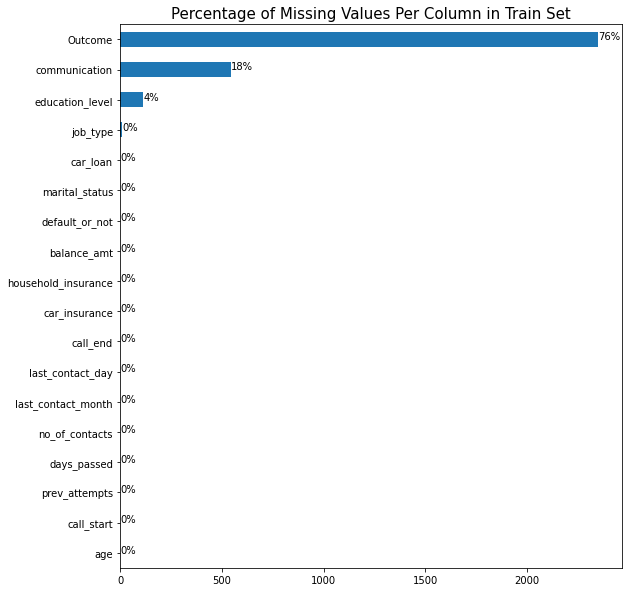

In [ ]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

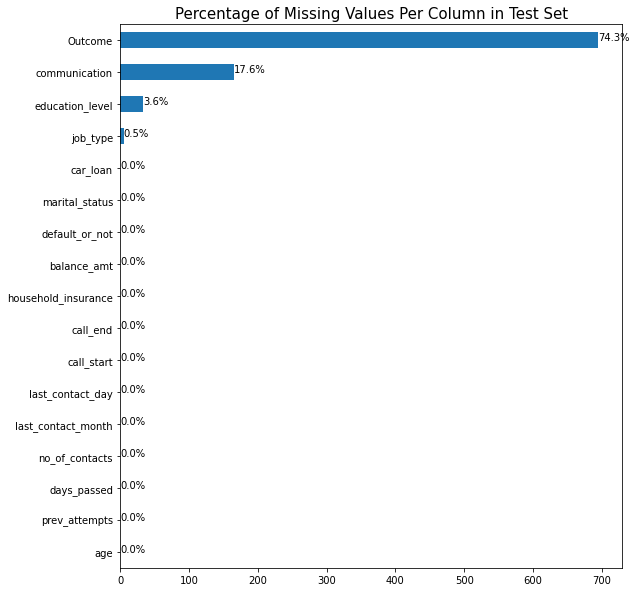

In [ ]:
# Check if there missing values in test set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

1. The **outcome column** has quite a large number of missing values. We really can't fill the values since the outcome of the calls highly vary and are unique from one customer to the other.
2. **Communication, Education level and Job type** columns can be filled with the mode of the column since it makes a more resonable assumption. 





## Combine train and test set for easy preprocessing 

In [ ]:
# Combine train and test set
ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((train, test)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (4037, 18)


In [ ]:
# Check the column names and datatypes
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4037 entries, 0 to 4036
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4037 non-null   float64
 1   job_type             4021 non-null   object 
 2   marital_status       4037 non-null   object 
 3   education_level      3890 non-null   object 
 4   default_or_not       4037 non-null   int64  
 5   balance_amt          4037 non-null   float64
 6   household_insurance  4037 non-null   int64  
 7   car_loan             4037 non-null   int64  
 8   communication        3329 non-null   object 
 9   last_contact_day     4037 non-null   int64  
 10  last_contact_month   4037 non-null   object 
 11  no_of_contacts       4037 non-null   int64  
 12  days_passed          4037 non-null   int64  
 13  prev_attempts        4037 non-null   int64  
 14  Outcome              991 non-null    object 
 15  call_start           4037 non-null   o

In [ ]:
#Dropping the outcome column
all_data.drop('Outcome', axis=1, inplace=True)

In [ ]:
# Convert Object to Category columns
cat_cols = all_data.select_dtypes(include=['object'],).columns
# Change columns to their respective datatypes
all_data[cat_cols] = all_data[cat_cols].astype('category')
# Confirm whether the changes have been successful
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4037 entries, 0 to 4036
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  4037 non-null   float64 
 1   job_type             4021 non-null   category
 2   marital_status       4037 non-null   category
 3   education_level      3890 non-null   category
 4   default_or_not       4037 non-null   int64   
 5   balance_amt          4037 non-null   float64 
 6   household_insurance  4037 non-null   int64   
 7   car_loan             4037 non-null   int64   
 8   communication        3329 non-null   category
 9   last_contact_day     4037 non-null   int64   
 10  last_contact_month   4037 non-null   category
 11  no_of_contacts       4037 non-null   int64   
 12  days_passed          4037 non-null   int64   
 13  prev_attempts        4037 non-null   int64   
 14  call_start           4037 non-null   category
 15  call_end             

## Fill in missing values


In [ ]:
# Fill in missing values
# For cat cols and date cols fill in with mode and for num cols fill in with 9999
for col in all_data.columns:
  if col in cat_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

# Confirm that there aren't any missing values
all_data[all_data.columns.difference(['car_insurance'])].isna().sum().any()


False

#Checking for Outliers

In [ ]:
# Checking for Outliers
#

Q1 = all_data.quantile(0.25)
Q3 = all_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                      17.0
default_or_not            0.0
balance_amt            1616.0
household_insurance       1.0
car_loan                  0.0
last_contact_day         13.0
no_of_contacts            2.0
days_passed              69.0
prev_attempts             1.0
car_insurance             1.0
dtype: float64


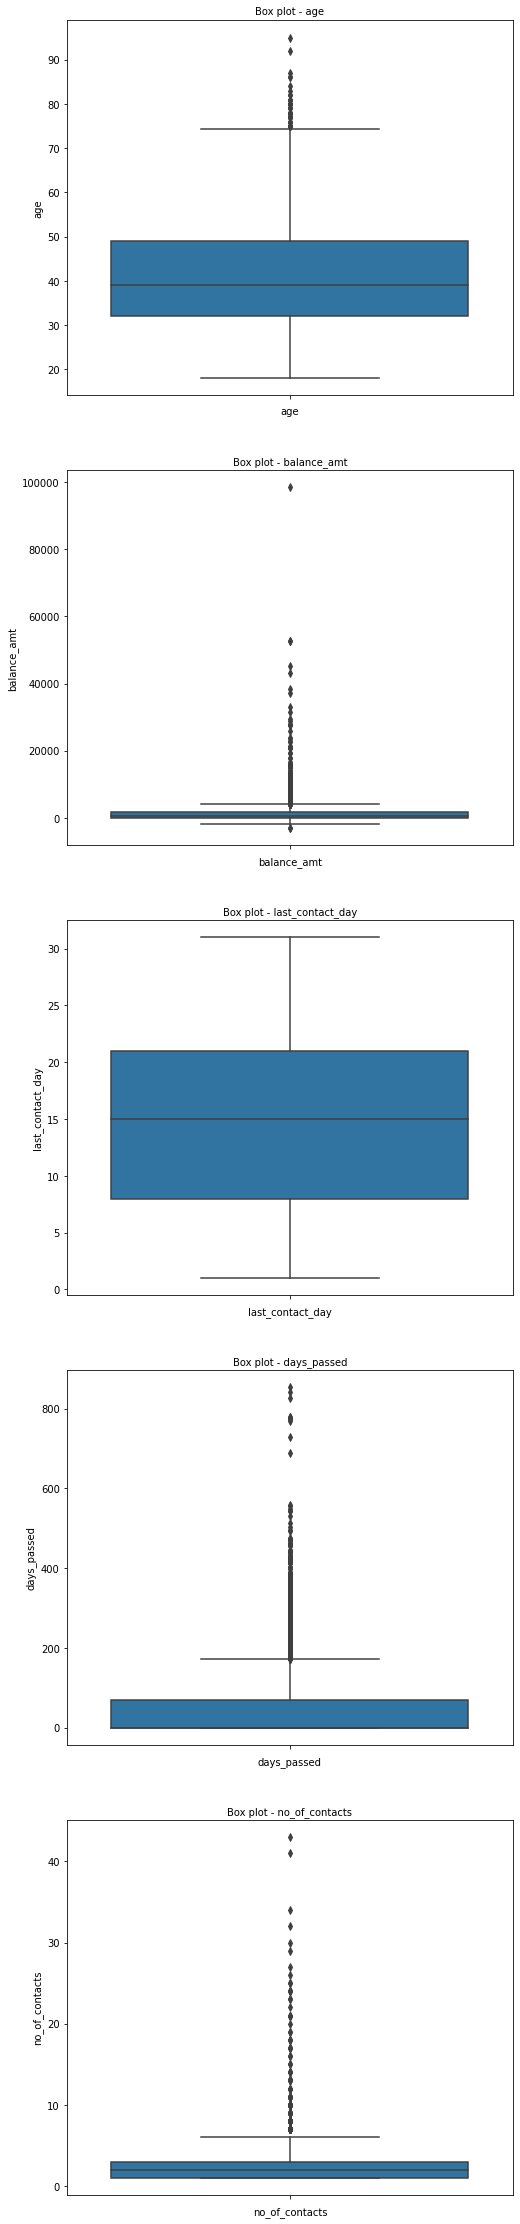

In [ ]:
#Plotting the box plot for columns with outliers

col_names = ['age','balance_amt','last_contact_day', 'days_passed', 'no_of_contacts']

fig,ax = plt.subplots(len(col_names),figsize=(8,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=all_data[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

The outliers kinda make sense thus will leave them as they are.

In [ ]:
#creating a copy of our data
copy_1 = all_data.copy()
#Checking for duplicates
print("The duplicates are {} ".format(all_data.duplicated().sum()))
#dropping the duplicates
all_data.drop_duplicates(inplace = True)
#Checking for duplicates
print("Confirming the duplicates are {} ".format(all_data.duplicated().sum()))

The duplicates are 300 
Confirming the duplicates are 0 


In [ ]:
all_data.drop(columns=['call_start', 'call_end'], axis=1,inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3737 entries, 0 to 4036
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   age                  3737 non-null   float64        
 1   job_type             3737 non-null   category       
 2   marital_status       3737 non-null   category       
 3   education_level      3737 non-null   category       
 4   default_or_not       3737 non-null   int64          
 5   balance_amt          3737 non-null   float64        
 6   household_insurance  3737 non-null   int64          
 7   car_loan             3737 non-null   int64          
 8   communication        3737 non-null   category       
 9   last_contact_day     3737 non-null   int64          
 10  last_contact_month   3737 non-null   category       
 11  no_of_contacts       3737 non-null   int64          
 12  days_passed          3737 non-null   int64          
 13  prev_attempts     

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3737 entries, 0 to 4036
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  3737 non-null   float64 
 1   job_type             3737 non-null   category
 2   marital_status       3737 non-null   category
 3   education_level      3737 non-null   category
 4   default_or_not       3737 non-null   int64   
 5   balance_amt          3737 non-null   float64 
 6   household_insurance  3737 non-null   int64   
 7   car_loan             3737 non-null   int64   
 8   communication        3737 non-null   category
 9   last_contact_day     3737 non-null   int64   
 10  last_contact_month   3737 non-null   category
 11  no_of_contacts       3737 non-null   int64   
 12  days_passed          3737 non-null   int64   
 13  prev_attempts        3737 non-null   int64   
 14  call_start           3737 non-null   category
 15  call_end             

### Feature Engineering
1. Some columns don't make sense to be used as is. We'll modify them then preprocess
2. We'll get dummies of the categorical columns

In [ ]:
all_data.head(3)

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,10:22:20,10:24:29,0.0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,09:06:30,13:59:48,1.0
2,36.000000,services,single,secondary,0,281.000000,1,0,cellular,16,may,1,-1,0,13:18:41,13:27:16,1.0


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3737 entries, 0 to 4036
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  3737 non-null   float64 
 1   job_type             3737 non-null   category
 2   marital_status       3737 non-null   category
 3   education_level      3737 non-null   category
 4   default_or_not       3737 non-null   int64   
 5   balance_amt          3737 non-null   float64 
 6   household_insurance  3737 non-null   int64   
 7   car_loan             3737 non-null   int64   
 8   communication        3737 non-null   category
 9   last_contact_day     3737 non-null   int64   
 10  last_contact_month   3737 non-null   category
 11  no_of_contacts       3737 non-null   int64   
 12  days_passed          3737 non-null   int64   
 13  prev_attempts        3737 non-null   int64   
 14  call_start           3737 non-null   category
 15  call_end             

In [ ]:
# Shape of data before encoding
all_data.shape

(3737, 16)

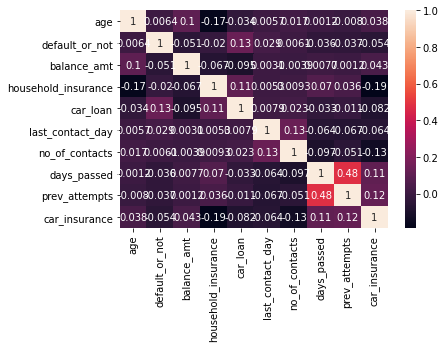

In [ ]:
#Correlation matrix.
#Plottting a heatmap to show correlation of different numerical variables
sns.heatmap(all_data.corr(), xticklabels = all_data.corr().columns, yticklabels = all_data.corr().columns, annot=True)

In [ ]:
# Checking for multicollinearity on the independent variables only

F = all_data.drop('car_insurance', 1)
correlations = F.corr()

# Computing the Variance Inflation Factor(VIF)
# We create a new dataframe with the INVERSE of the correlations above.
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,no_of_contacts,days_passed,prev_attempts
age,1.039159,-0.009360,-0.093978,0.169730,0.008826,-0.004052,-0.020957,-0.019762,0.010365
default_or_not,-0.009360,1.023376,0.042521,0.034237,-0.136091,-0.026071,0.003277,0.015879,0.025640
balance_amt,-0.093978,0.042521,1.022777,0.045090,0.083274,-0.005521,0.003191,-0.007858,0.002497
household_insurance,0.169730,0.034237,0.045090,1.050090,-0.110411,-0.009557,-0.016570,-0.078768,0.000371
car_loan,0.008826,-0.136091,0.083274,-0.110411,1.040019,0.000303,-0.018403,0.039509,-0.009387
last_contact_day,-0.004052,-0.026071,-0.005521,-0.009557,0.000303,1.023641,-0.132055,0.029025,0.047611
no_of_contacts,-0.020957,0.003277,0.003191,-0.016570,-0.018403,-0.132055,1.027658,0.092851,-0.001179
days_passed,-0.019762,0.015879,-0.007858,-0.078768,0.039509,0.029025,0.092851,1.323840,-0.630756
prev_attempts,0.010365,0.025640,0.002497,0.000371,-0.009387,0.047611,-0.001179,-0.630756,1.309541


There's neither a high correlation nor multicollinearity.

In [ ]:
# Use one hot encoding to turn categorical features to numerical features
# Encode categorical features
all_data2 = all_data.copy()
all_data = pd.get_dummies(data = all_data)
all_data.head()

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,no_of_contacts,days_passed,prev_attempts,car_insurance,call_duration,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,marital_status_divorced,marital_status_married,marital_status_single,education_level_primary,education_level_secondary,education_level_tertiary,communication_cellular,communication_telephone,last_contact_month_apr,last_contact_month_aug,last_contact_month_dec,last_contact_month_feb,last_contact_month_jan,last_contact_month_jul,last_contact_month_jun,last_contact_month_mar,last_contact_month_may,last_contact_month_nov,last_contact_month_oct,last_contact_month_sep
0,47.000000,0,1112.000000,1,0,13,1,-1,0,0.0,0 days 00:02:09,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,46.031442,0,1.312372,0,1,15,3,219,1,1.0,0 days 04:53:18,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,36.000000,0,281.000000,1,0,16,1,-1,0,1.0,0 days 00:08:35,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,32.000000,0,540.000000,0,1,29,1,-1,0,1.0,0 days 00:12:30,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,30.000000,0,315.000000,1,0,14,3,346,4,1.0,0 days 00:14:44,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Shape of data after encoding
all_data.shape

(3737, 42)

In [ ]:
# Separate train and test data from the combined dataframe
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((3102, 5928), (935, 5928))

In [ ]:
# Select main columns to be used in training

y = train_df.car_insurance.astype(int)
X = train_df.drop('car_insurance', axis=1)
y = train_df.car_insurance.astype(int)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Check the auc score of the model
print(f'RandomForest AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

RandomForest AUC score on the X_test is: 0.8381991511404777

              precision    recall  f1-score   support

           0       0.75      0.63      0.69       394
           1       0.76      0.84      0.80       537

    accuracy                           0.76       931
   macro avg       0.75      0.74      0.74       931
weighted avg       0.75      0.76      0.75       931



In [ ]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 10, max_depth=5)

forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.head(5)

,Actual,Predicted
2115,0,1
457,0,1
1820,0,1
2413,1,1
564,1,1


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score, accuracy_score
print("R2 score : %.2f" % r2_score(y_test,y_pred))

print('accuracy_score:',accuracy_score (y_test , y_pred))

print('F1_score:',f1_score(y_test, y_pred))

R2 score : -0.73
accuracy_score: 0.5767991407089151
F1_score: 0.731607629427793


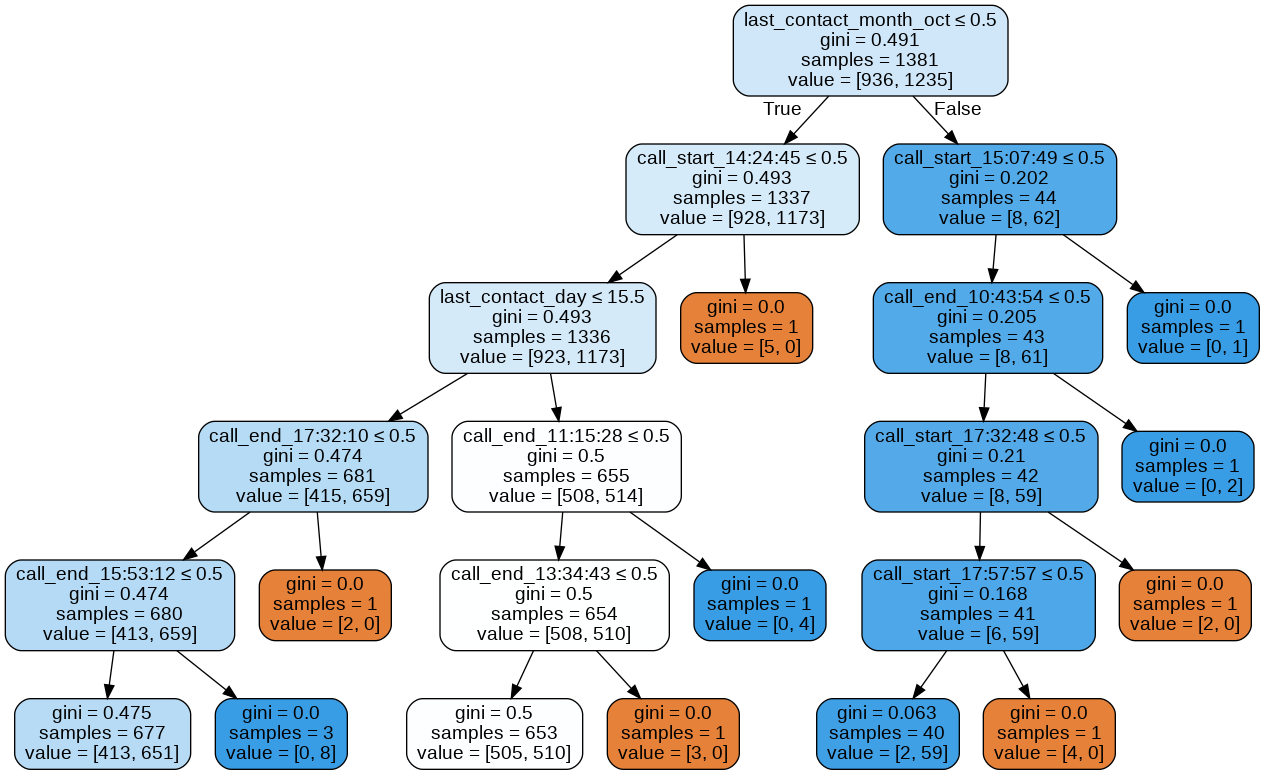

In [ ]:

# Visualizing tree number 25

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

y_pred = forest.predict(X_test)
dot_data = StringIO()

# picking a specific tree from the forest; 

tree = forest.estimators_[25]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_Test.png')
Image(graph.create_png())

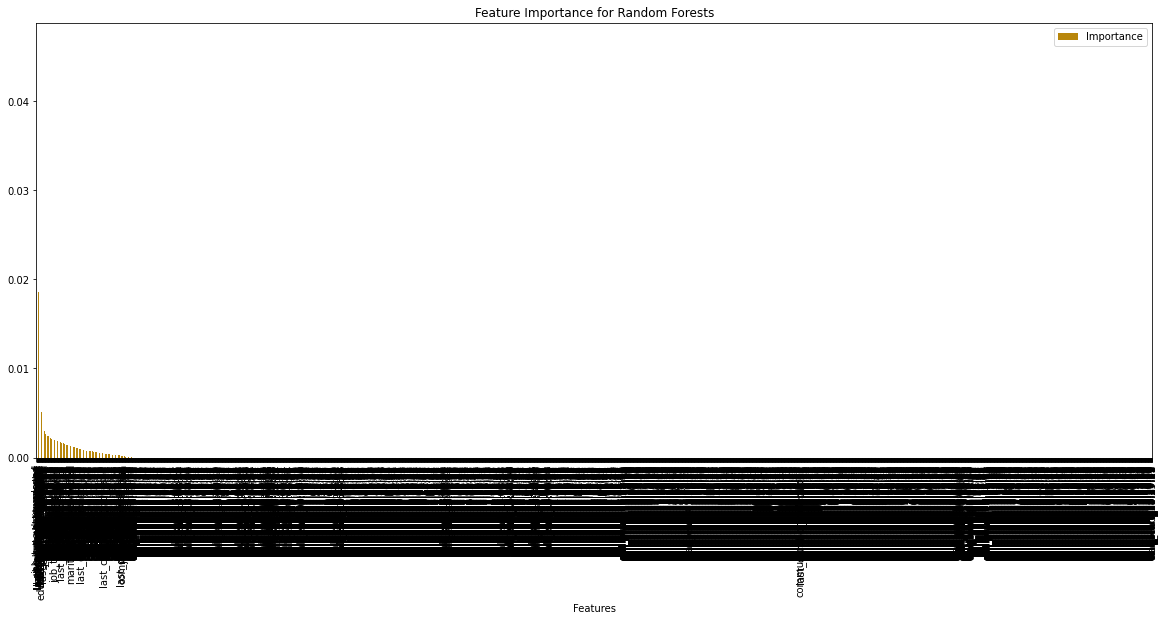

In [ ]:
# Getting the feature importance

df = pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')
df

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

params = {'n_estimators' : [250, 300, 450, 500, 600]}

ada_boost = AdaBoostClassifier()

search = GridSearchCV(ada_boost, scoring = 'accuracy', param_grid = params, cv = 10)

search.fit(X, y)

search.best_params_

{'n_estimators': 600}

In [ ]:

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=600, random_state=5)
X_train.drop('call_duration', axis=1)
ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_ada))

print('F1_score:',f1_score(y_test, y_pred))
# The accuracy score is 99.5 which is a very high score

KeyError: ignored

### Train different model and compare results

In [ ]:
# Train model
model = LGBMClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Check the auc score of the model
print(f'LGBM AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

LGBM AUC score on the X_test is: 0.8065630642127252

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       394
           1       0.77      0.77      0.77       537

    accuracy                           0.74       931
   macro avg       0.73      0.73      0.73       931
weighted avg       0.74      0.74      0.74       931



- There is a light improvement when using LGBMClassifier

[More on AUC score](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=AUC%20represents%20the%20probability%20that,has%20an%20AUC%20of%201.0.)

### Making predictions of the test set and creating a submission file

In [ ]:
# test_df.columns = ['call_duration']
# test_df['call_duration'] = pd.to_datetime(test_df['call_duration'])
test_df['call_duration']=test_df['call_duration'].map(dt.datetime.toordinal)

NameError: ignored

In [ ]:
# Make prediction on the test set
test_df = all_data[ntrain:]
test_df = test_df.drop(labels=['car_insurance'], axis=1)

predictions = ada_boost.predict(test_df)

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.target = predictions

# # Check the distribution of your predictions
sns.countplot([1 if x >= 0.5 else 0 for x in sub_file.target])
plt.title('Predicted Variable Distribution');

TypeError: ignored

In [ ]:
# Create a csv file and upload to zindi 
sub_file.to_csv('Baseline.csv', index = False)
sub_file.head()

,ID,target
0,ID_0000005111,0.837602
1,ID_0000389416,0.345246
2,ID_0000634789,0.386608
3,ID_0000778100,0.961485
4,ID_0001123210,0.573753


###More Tips
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

# ******************* GOOD LUCK!!! ***************************